# Explain the Inception model architecture and its architectural benefits.

Inception v3
Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. It is a convolutional neural network that has about 310 layers and it is 48 layers deep.The Inception Module is based on a pattern recognition network which mimics the animal visual cortex.

Advantages

1. Parallel Convolution Filters 

The module acts as multiple convolution filters, that are applied to the same input, with some pooling. The results are then concatenated. This allows the model to take advantage of multi-level feature extraction. 
Example
For instance, it extracts general (5x5) and local (1x1) features at the same time. Using multiple features from multiple filters improve the performance of the network. 

2. Cross-Channel and Cross-Spatial Coorelation 

All the architectures prior to inception, performed convolution on the spatial and channel wise domain together. 
Example
By performing the 1x1 convolution, the inception block is doing cross-channel correlations, ignoring the spatial dimensions. This is followed by cross-spatial and cross-channel correlations via the 3x3 and 5x5 filters.


Comparison of VGG16 and Inception v3

1. In VGG16 we have convolution filters and max pooling layers whereas Inception v3 consists of Inception modules which futher consist of 1x1 conv layer, 3x3 conv layer,5x5 conv layer and max pooling with their output filter banks concatenated into a single output vector forming the input of the next stage.
2. For effective recognition of such a variable-sized feature, we need kernels of different sizes. That is what Inception does. Instead of simply going deeper in terms of the number of layers, it goes wider. Multiple kernels of different sizes are implemented within the same layer.


# Implement Transfer Learning with data augmentation using Inception v3

Loading Dataset

Original dataset directory should be changed when you will run that program
You can define your own base directory

Code in below cell should be executed once.


In [ ]:
import os, shutil
original_dataset_dir = 'D:\MSSEMESTER3\Deeplearning\Assignments\Assignment3\dogs-vs-cats'
base_dir = 'D:\MSSEMESTER3\Deeplearning\Assignments\Assignment3\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

I am using GPU so if you are going to test that code on GPU please add these lines.

In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


#  Implement Transfer Learning with data augmentation using Inception v3 

This is the number of trainable weights before freezing the conv base: 192
This is the number of trainable weights after freezing the conv base: 4
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 - 18s - loss: 0.3662 - acc: 0.8615 - val_loss: 0.1927 - val_acc: 0.9440
Epoch 2/30
100/100 - 11s - loss: 0.2370 - acc: 0.9135 - val_loss: 0.1425 - val_acc: 0.9580
Epoch 3/30
100/100 - 11s - loss: 0.2022 - acc: 0.9215 - val_loss: 0.1458 - val_acc: 0.9530
Epoch 4/30
100/100 - 11s - loss: 0.1890 - acc: 0.9285 - val_loss: 0.1823 - val_acc: 0.9440
Epoch 5/30
100/100 - 12s - loss: 0.1687 - acc: 0.9300 - val_loss: 0.1264 - val_acc: 0.9620
Epoch 6/30
100/100 - 11s - loss: 0.1738 - acc: 0.9325 - val_loss: 0.1128 - val_acc: 0.9630
Epoch 7/30
100/100 - 11s - loss: 0.1546 - acc: 0.9350 - val_loss: 0.1205 - val_acc: 0.9620
Epoch 8/30
100/100 - 11s - loss: 0.1585 - acc: 0.9355 - 

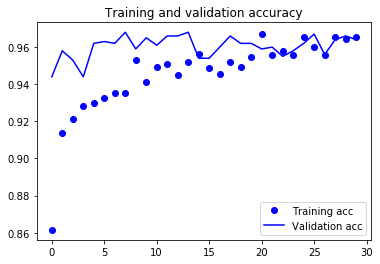

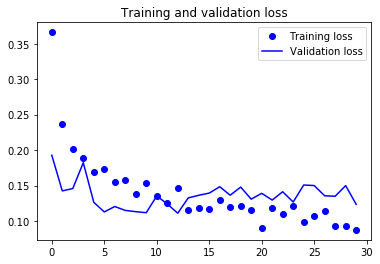

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers

base_dir = 'D:\MSSEMESTER3\Deeplearning\Assignments\Assignment3\cats_and_dogs_small'

from keras.applications.inception_v3 import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



#  Implement Fine Tuning with data augmentation using Inceptions v3, named the layers you started retraining from, and the reason for choosing them

Epoch 1/100
100/100 [==============================] - 15s 153ms/step - loss: 0.0870 - acc: 0.9675 - val_loss: 0.1312 - val_acc: 0.9670
Epoch 2/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0710 - acc: 0.9740 - val_loss: 0.1466 - val_acc: 0.9660
Epoch 3/100
100/100 [==============================] - 13s 130ms/step - loss: 0.0708 - acc: 0.9735 - val_loss: 0.1253 - val_acc: 0.9670
Epoch 4/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0747 - acc: 0.9685 - val_loss: 0.1389 - val_acc: 0.9670
Epoch 5/100
100/100 [==============================] - 13s 130ms/step - loss: 0.0800 - acc: 0.9685 - val_loss: 0.1335 - val_acc: 0.9640
Epoch 6/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0789 - acc: 0.9680 - val_loss: 0.1302 - val_acc: 0.9650
Epoch 7/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0746 - acc: 0.9715 - val_loss: 0.1279 - val_acc: 0.9650
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 15s 150ms/step - loss: 0.0428 - acc: 0.9835 - val_loss: 0.1322 - val_acc: 0.9640
Epoch 62/100
100/100 [==============================] - 15s 147ms/step - loss: 0.0479 - acc: 0.9805 - val_loss: 0.1401 - val_acc: 0.9640
Epoch 63/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0543 - acc: 0.9765 - val_loss: 0.1454 - val_acc: 0.9660
Epoch 64/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0435 - acc: 0.9865 - val_loss: 0.1388 - val_acc: 0.9640
Epoch 65/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0592 - acc: 0.9760 - val_loss: 0.1309 - val_acc: 0.9640
Epoch 66/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0481 - acc: 0.9805 - val_loss: 0.1381 - val_acc: 0.9600
Epoch 67/100
100/100 [==============================] - 13s 127ms/step - loss: 0.0630 - acc: 0.9745 - val_loss: 0.1231 - val_acc: 0.9620
Epoch 68/100
100/100 [===================

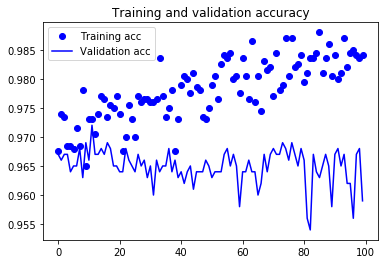

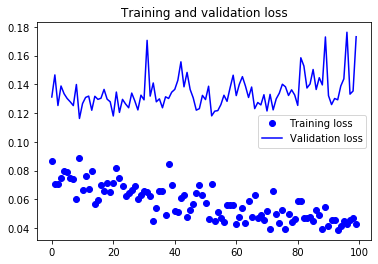

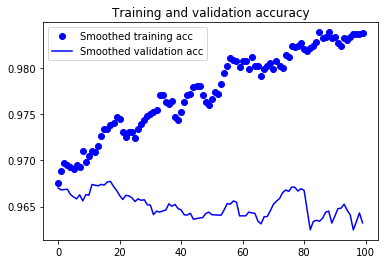

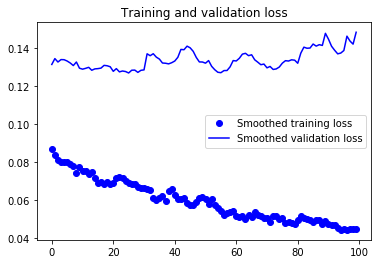

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.949999988079071
Epoch 1/100
100/100 [==============================] - 14s 138ms/step - loss: 0.0449 - acc: 0.9825 - val_loss: 0.1463 - val_acc: 0.9640
Epoch 2/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0397 - acc: 0.9870 - val_loss: 0.1515 - val_acc: 0.9660
Epoch 3/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.1504 - val_acc: 0.9660
Epoch 4/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0428 - acc: 0.9850 - val_loss: 0.1473 - val_acc: 0.9680
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0413 - acc: 0.9845 - val_loss: 0.1445 - val_acc: 0.9660
Epoch 6/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0495 - acc: 0.9805 - val_loss: 0.1622 - val_acc: 0.9630
Epoch 7/100
100/100 [============

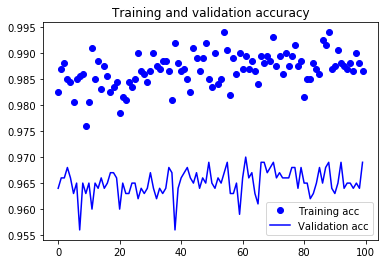

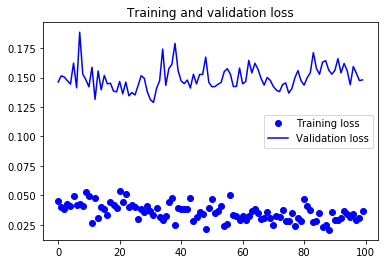

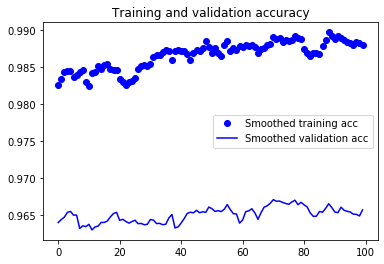

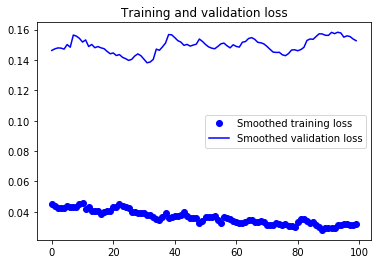

Found 1000 images belonging to 2 classes.
test acc: 0.9610000252723694


In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers

from keras.applications.inception_v3 import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = True


# After mixed Layer 9  is the last inception block.
# I will first set all layers after mixed layer 9 as trainable


# After mixed Layer 8  are the last two inception block.
# After that I will set last two incpetions blocks trainable.

for layer in conv_base.layers[:280]:
   layer.trainable = False
for layer in conv_base.layers[280:]:
   layer.trainable = True

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)


###############################################Last two Inception Blocks##################################################
for layer in conv_base.layers[:249]:
   layer.trainable = False
for layer in conv_base.layers[249:]:
   layer.trainable = True

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)





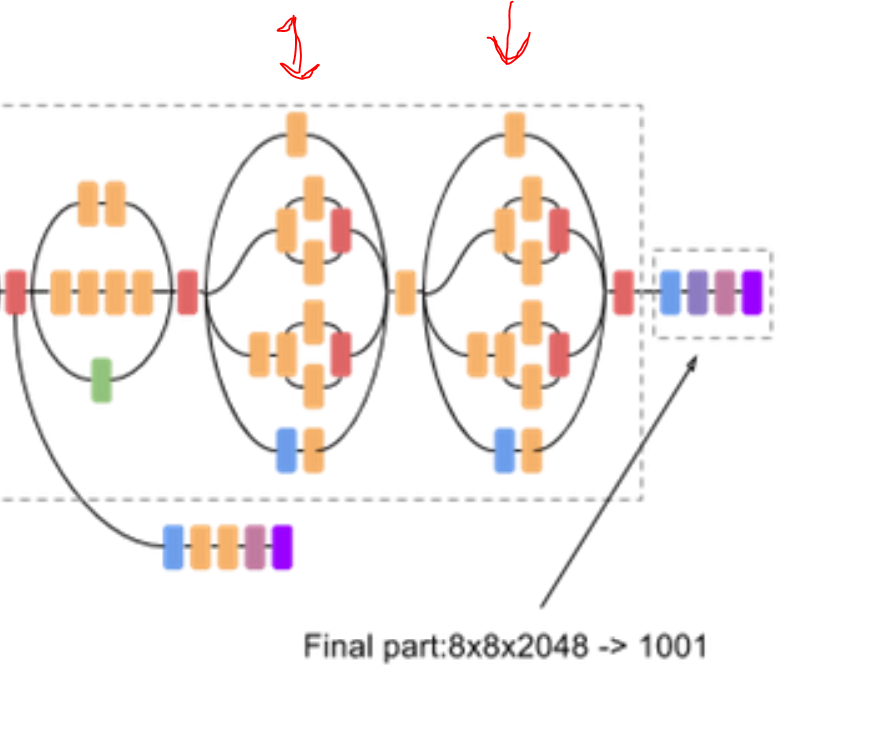

We can set last Inception block to true.

"Mixed = 9"

After "mixed Layer 9"  is the last inception block.

I will first set all layers after mixed layer 9 as trainable.

Why these layers?

1. Speed up the training
2. Overcome small dataset size
3. Lower layer contain features which can detect small components in the image. Small components can change with very small variation in new set of images so we can retrain them to improve accuracy.
4. We choose only last layers so that gradient effect can be normalize. If we train whole network then transfer learning is useless because there is possiblity that model will forget all the weights during backpropagation, which it have learn.


These layers are good for when doing fine-tuning.

Test Accuracy  0.949999988079071

Another variation.

After "mixed Layer 8"  are the last two inception block.

After that I will set last two incpetions blocks trainable.

Test Accuracy 0.9610000252723694

# Compare the results you get from step 1 and 2 with the class results (VGG16 models); explain your observation and state how the results relate to different models’architecture

VGG16 Transfer Learning Accuracy = 71s - loss: 0.0354 - acc: 0.9885 - val_loss: 0.1832 - val_acc: 0.9510

VGG16 Fine tuning Learning Accuracy = 33s - loss: 0.0010 - acc: 0.9995 - val_loss: 0.2403 - val_acc: 0.9750

Inception Transfer Learning Accuracy = 13s - loss: 0.0875 - acc: 0.9655 - val_loss: 0.1236 - val_acc: 0.9640

Inception Fine tuning Learning Accuracy = 13s  - loss: 0.0367 - acc: 0.9865 - val_loss: 0.1480 - val_acc: 0.9690


As we can see that Inception takes less time as compared to VGG16.
Inception uses less paramters to achieve same performance as that of VGG16.Inception uses less paramters but its parameter are more useful because it extracts features of different size from same input in parallel which increases its performance.


1. In VGG16 we have convolution filters and max pooling layers whereas Inception v3 consists of Inception modules which futher consist of 1x1 conv layer, 3x3 conv layer,5x5 conv layer and max pooling with their output filter banks concatenated into a single output vector forming the input of the next stage.
2. For effective recognition of such a variable-sized feature, we need kernels of different sizes. That is what Inception does. Instead of simply going deeper in terms of the number of layers, it goes wider. Multiple kernels of different sizes are implemented within the same layer.

Total number of paramters in Inception v3 = 24M parameters

Total number of paramters in Inception v3 = 138 million parameters

Ref https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96#:~:text=VGG16%20has%20a%20total%20of,with%20a%20stride%20of%20two.

# State the difference between transfer learning and fine-tuning techniques?

Transfer learning is when a model developed for one task is reused to work on a second task. Fine tuning is one approach to transfer learning. Fine-tuning, in general, means making small adjustments to a process to achieve the desired output or performance. 

# Compare the output of the second layer and the original image (output of the first layer) from the Inception Fine Tuning (you trained for Cat vs. Dog problem); what changes do you find?

(1, 150, 150, 3)


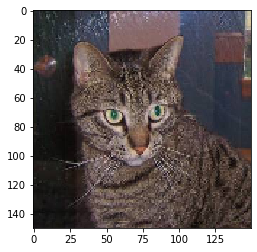

(1, 74, 74, 32)
(1, 74, 74, 32)
(1, 74, 74, 32)


c:\users\muhammad muneeb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


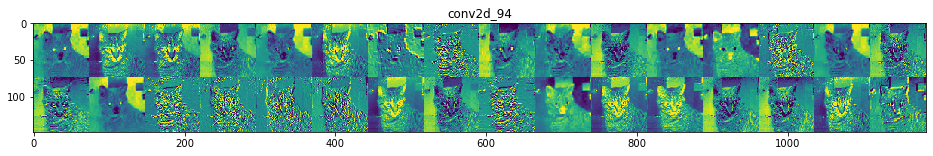

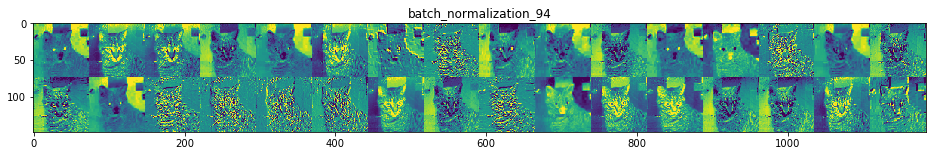

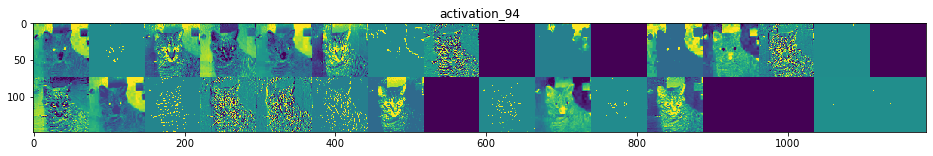

In [31]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img('D:/MSSEMESTER3/Deeplearning/Assignments/Assignment3/cats_and_dogs_small/train/cats/cat.1.jpg', target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()
model = conv_base
###Activations
from keras import models
layer_outputs=[]
layer_outputs.append(model.layers[1].output)
layer_outputs.append(model.layers[2].output)
layer_outputs.append(model.layers[3].output)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)



import keras
layer_names = []
layer_names.append(model.layers[1].name)
layer_names.append(model.layers[2].name)
layer_names.append(model.layers[3].name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    print(layer_activation.shape)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

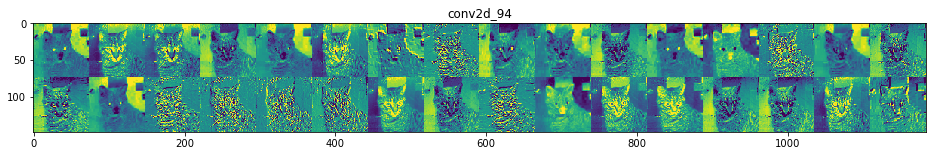

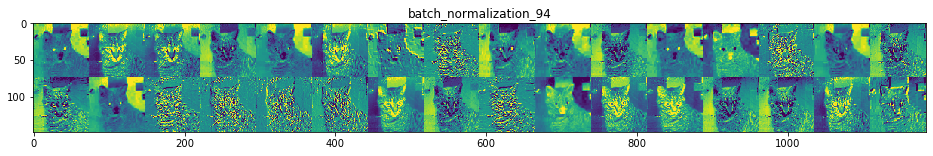

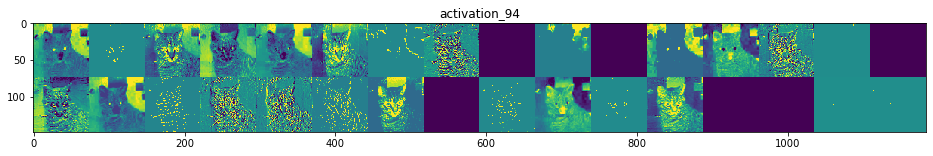

# Question 1,2,3 Explain your observation for step 1 and step 2.


Original Image and Second layer output.

Original Image dimension
1. (1, 150, 150, 3)

3 Channel image of size 150 by 150

Second Layer output
1. (1, 74, 74, 32)

2. Size of the image has been changed and there are multiple filters (32) applied on the original image to extract the useful features.

3. Second layer is a 2D convolution layer with filter size 94. So, the resulting image wil be of size 74 by 74 and 32 filters are used.

4. Second layer is trying to learn the whole cat image not small components like eye or face. Each of the 32 filters trying to detect the big component in the whole image.

Second layer output and third layer output.

Second layer output dimension
1. (1, 74, 74, 32)


Third layer output
1. (1, 74, 74, 32)

2. Size of the image is same as the previous layer because third layer is batch normalization layer.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
